In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

from defining_the_hamiltonian import fermi_hubbard_hamiltonian

from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram


from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import qiskit_ibm_runtime.fake_provider as fakes

from qiskit_aer import AerSimulator


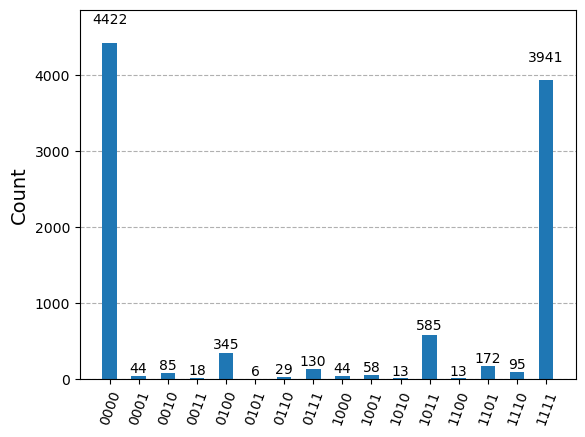

In [4]:
backend = fakes.FakeManilaV2()
# backend_noisy = AerSimulator.from_backend(backend)


num_qubits = 4

circuit = QuantumCircuit(num_qubits)
circuit.h(0)
for j in range(1,num_qubits):
    circuit.cx(0, j)
circuit.measure_all()

transpiled_circuit = transpile(circuit, backend)
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit], shots=10000)
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)